In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [16]:
path = path = 'C:\\Users\\HP\\Downloads\\implementation_of_RCNN-master\\implementation_of_RCNN-master\\DATA\\agri_data'


# Preprocessing

In [17]:
df = pd.read_csv('C:\\Users\\HP\\Downloads\\implementation_of_RCNN-master\\implementation_of_RCNN-master\\DATA\\agri_label.csv')

In [18]:
df.head()

filename  width  height class  xmin  ymin  xmax  ymax
0  agri_0_9354.jpeg    512     512  weed    63   120   425   442
1  agri_0_9354.jpeg    512     512  weed     0     1   180   148
2  agri_0_7574.jpeg    512     512  crop    95   167   453   469
3  agri_0_8960.jpeg    512     512  weed    52    76   422   353
4   agri_0_417.jpeg    512     512  weed     7    75   511   411

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2072 non-null   object
 1   width     2072 non-null   int64 
 2   height    2072 non-null   int64 
 3   class     2072 non-null   object
 4   xmin      2072 non-null   int64 
 5   ymin      2072 non-null   int64 
 6   xmax      2072 non-null   int64 
 7   ymax      2072 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 129.6+ KB


now checking all labeled images are available in the folder or not 

In [20]:
folder_images = os.listdir(path)

In [21]:
len(folder_images)

1300

In [22]:
train_images = folder_images[:1000]

In [23]:
test_images = folder_images[1000:]

In [24]:
j=0
for i in tqdm(list(df['filename'].unique())):
    if i in folder_images:
        j+=1
print(j)        

100%|██████████| 1300/1300 [00:00<00:00, 32915.17it/s]

1300


# Visualizing the Dataset

In [25]:
print(df.head())


           filename  width  height class  xmin  ymin  xmax  ymax
0  agri_0_9354.jpeg    512     512  weed    63   120   425   442
1  agri_0_9354.jpeg    512     512  weed     0     1   180   148
2  agri_0_7574.jpeg    512     512  crop    95   167   453   469
3  agri_0_8960.jpeg    512     512  weed    52    76   422   353
4   agri_0_417.jpeg    512     512  weed     7    75   511   411


In [26]:
print(folder_images)


['agri_0_1009.jpeg', 'agri_0_1017.jpeg', 'agri_0_1018.jpeg', 'agri_0_1020.jpeg', 'agri_0_1024.jpeg', 'agri_0_1026.jpeg', 'agri_0_1028.jpeg', 'agri_0_1041.jpeg', 'agri_0_1053.jpeg', 'agri_0_106.jpeg', 'agri_0_1068.jpeg', 'agri_0_1079.jpeg', 'agri_0_1082.jpeg', 'agri_0_1083.jpeg', 'agri_0_1094.jpeg', 'agri_0_1095.jpeg', 'agri_0_110.jpeg', 'agri_0_1114.jpeg', 'agri_0_1119.jpeg', 'agri_0_1123.jpeg', 'agri_0_1129.jpeg', 'agri_0_113.jpeg', 'agri_0_1130.jpeg', 'agri_0_114.jpeg', 'agri_0_1140.jpeg', 'agri_0_1146.jpeg', 'agri_0_1166.jpeg', 'agri_0_1168.jpeg', 'agri_0_1171.jpeg', 'agri_0_1173.jpeg', 'agri_0_1174.jpeg', 'agri_0_1177.jpeg', 'agri_0_1192.jpeg', 'agri_0_1193.jpeg', 'agri_0_1198.jpeg', 'agri_0_1210.jpeg', 'agri_0_1211.jpeg', 'agri_0_1214.jpeg', 'agri_0_1215.jpeg', 'agri_0_122.jpeg', 'agri_0_1221.jpeg', 'agri_0_1242.jpeg', 'agri_0_1258.jpeg', 'agri_0_126.jpeg', 'agri_0_1260.jpeg', 'agri_0_129.jpeg', 'agri_0_131.jpeg', 'agri_0_1314.jpeg', 'agri_0_1317.jpeg', 'agri_0_1320.jpeg', 'agri_0

In [27]:
temp_img = cv2.imread(path)

if temp_img is None:
    print(f"Warning: Image at path {path} could not be loaded.")
     # Skip this iteration if the image cannot be loaded


In [28]:
print(f"Folder Images: {folder_images}")
print(f"Image Path: {path}")


Folder Images: ['agri_0_1009.jpeg', 'agri_0_1017.jpeg', 'agri_0_1018.jpeg', 'agri_0_1020.jpeg', 'agri_0_1024.jpeg', 'agri_0_1026.jpeg', 'agri_0_1028.jpeg', 'agri_0_1041.jpeg', 'agri_0_1053.jpeg', 'agri_0_106.jpeg', 'agri_0_1068.jpeg', 'agri_0_1079.jpeg', 'agri_0_1082.jpeg', 'agri_0_1083.jpeg', 'agri_0_1094.jpeg', 'agri_0_1095.jpeg', 'agri_0_110.jpeg', 'agri_0_1114.jpeg', 'agri_0_1119.jpeg', 'agri_0_1123.jpeg', 'agri_0_1129.jpeg', 'agri_0_113.jpeg', 'agri_0_1130.jpeg', 'agri_0_114.jpeg', 'agri_0_1140.jpeg', 'agri_0_1146.jpeg', 'agri_0_1166.jpeg', 'agri_0_1168.jpeg', 'agri_0_1171.jpeg', 'agri_0_1173.jpeg', 'agri_0_1174.jpeg', 'agri_0_1177.jpeg', 'agri_0_1192.jpeg', 'agri_0_1193.jpeg', 'agri_0_1198.jpeg', 'agri_0_1210.jpeg', 'agri_0_1211.jpeg', 'agri_0_1214.jpeg', 'agri_0_1215.jpeg', 'agri_0_122.jpeg', 'agri_0_1221.jpeg', 'agri_0_1242.jpeg', 'agri_0_1258.jpeg', 'agri_0_126.jpeg', 'agri_0_1260.jpeg', 'agri_0_129.jpeg', 'agri_0_131.jpeg', 'agri_0_1314.jpeg', 'agri_0_1317.jpeg', 'agri_0_1320

In [29]:
print(df.head())
print("Unique filenames in df:", df['filename'].unique())


           filename  width  height class  xmin  ymin  xmax  ymax
0  agri_0_9354.jpeg    512     512  weed    63   120   425   442
1  agri_0_9354.jpeg    512     512  weed     0     1   180   148
2  agri_0_7574.jpeg    512     512  crop    95   167   453   469
3  agri_0_8960.jpeg    512     512  weed    52    76   422   353
4   agri_0_417.jpeg    512     512  weed     7    75   511   411
Unique filenames in df: ['agri_0_9354.jpeg' 'agri_0_7574.jpeg' 'agri_0_8960.jpeg' ...
 'agri_0_2825.jpeg' 'agri_0_9252.jpeg' 'agri_0_8141.jpeg']


1it [00:00,  4.78it/s]

Attempting to load image from path: C:\Users\HP\Downloads\implementation_of_RCNN-master\implementation_of_RCNN-master\DATA\agri_data\agri_0_1009.jpeg


3it [00:00, 10.94it/s]

Attempting to load image from path: C:\Users\HP\Downloads\implementation_of_RCNN-master\implementation_of_RCNN-master\DATA\agri_data\agri_0_1017.jpeg
Attempting to load image from path: C:\Users\HP\Downloads\implementation_of_RCNN-master\implementation_of_RCNN-master\DATA\agri_data\agri_0_1018.jpeg
Attempting to load image from path: C:\Users\HP\Downloads\implementation_of_RCNN-master\implementation_of_RCNN-master\DATA\agri_data\agri_0_1020.jpeg
Attempting to load image from path: C:\Users\HP\Downloads\implementation_of_RCNN-master\implementation_of_RCNN-master\DATA\agri_data\agri_0_1024.jpeg


7it [00:00, 15.09it/s]

Attempting to load image from path: C:\Users\HP\Downloads\implementation_of_RCNN-master\implementation_of_RCNN-master\DATA\agri_data\agri_0_1026.jpeg
Attempting to load image from path: C:\Users\HP\Downloads\implementation_of_RCNN-master\implementation_of_RCNN-master\DATA\agri_data\agri_0_1028.jpeg
Attempting to load image from path: C:\Users\HP\Downloads\implementation_of_RCNN-master\implementation_of_RCNN-master\DATA\agri_data\agri_0_1041.jpeg
Attempting to load image from path: C:\Users\HP\Downloads\implementation_of_RCNN-master\implementation_of_RCNN-master\DATA\agri_data\agri_0_1053.jpeg


12it [00:00, 18.60it/s]

Attempting to load image from path: C:\Users\HP\Downloads\implementation_of_RCNN-master\implementation_of_RCNN-master\DATA\agri_data\agri_0_106.jpeg
Attempting to load image from path: C:\Users\HP\Downloads\implementation_of_RCNN-master\implementation_of_RCNN-master\DATA\agri_data\agri_0_1068.jpeg
Attempting to load image from path: C:\Users\HP\Downloads\implementation_of_RCNN-master\implementation_of_RCNN-master\DATA\agri_data\agri_0_1079.jpeg
Attempting to load image from path: C:\Users\HP\Downloads\implementation_of_RCNN-master\implementation_of_RCNN-master\DATA\agri_data\agri_0_1082.jpeg
Attempting to load image from path: C:\Users\HP\Downloads\implementation_of_RCNN-master\implementation_of_RCNN-master\DATA\agri_data\agri_0_1083.jpeg
Attempting to load image from path: C:\Users\HP\Downloads\implementation_of_RCNN-master\implementation_of_RCNN-master\DATA\agri_data\agri_0_1094.jpeg


16it [00:00, 17.22it/s]


Attempting to load image from path: C:\Users\HP\Downloads\implementation_of_RCNN-master\implementation_of_RCNN-master\DATA\agri_data\agri_0_1095.jpeg


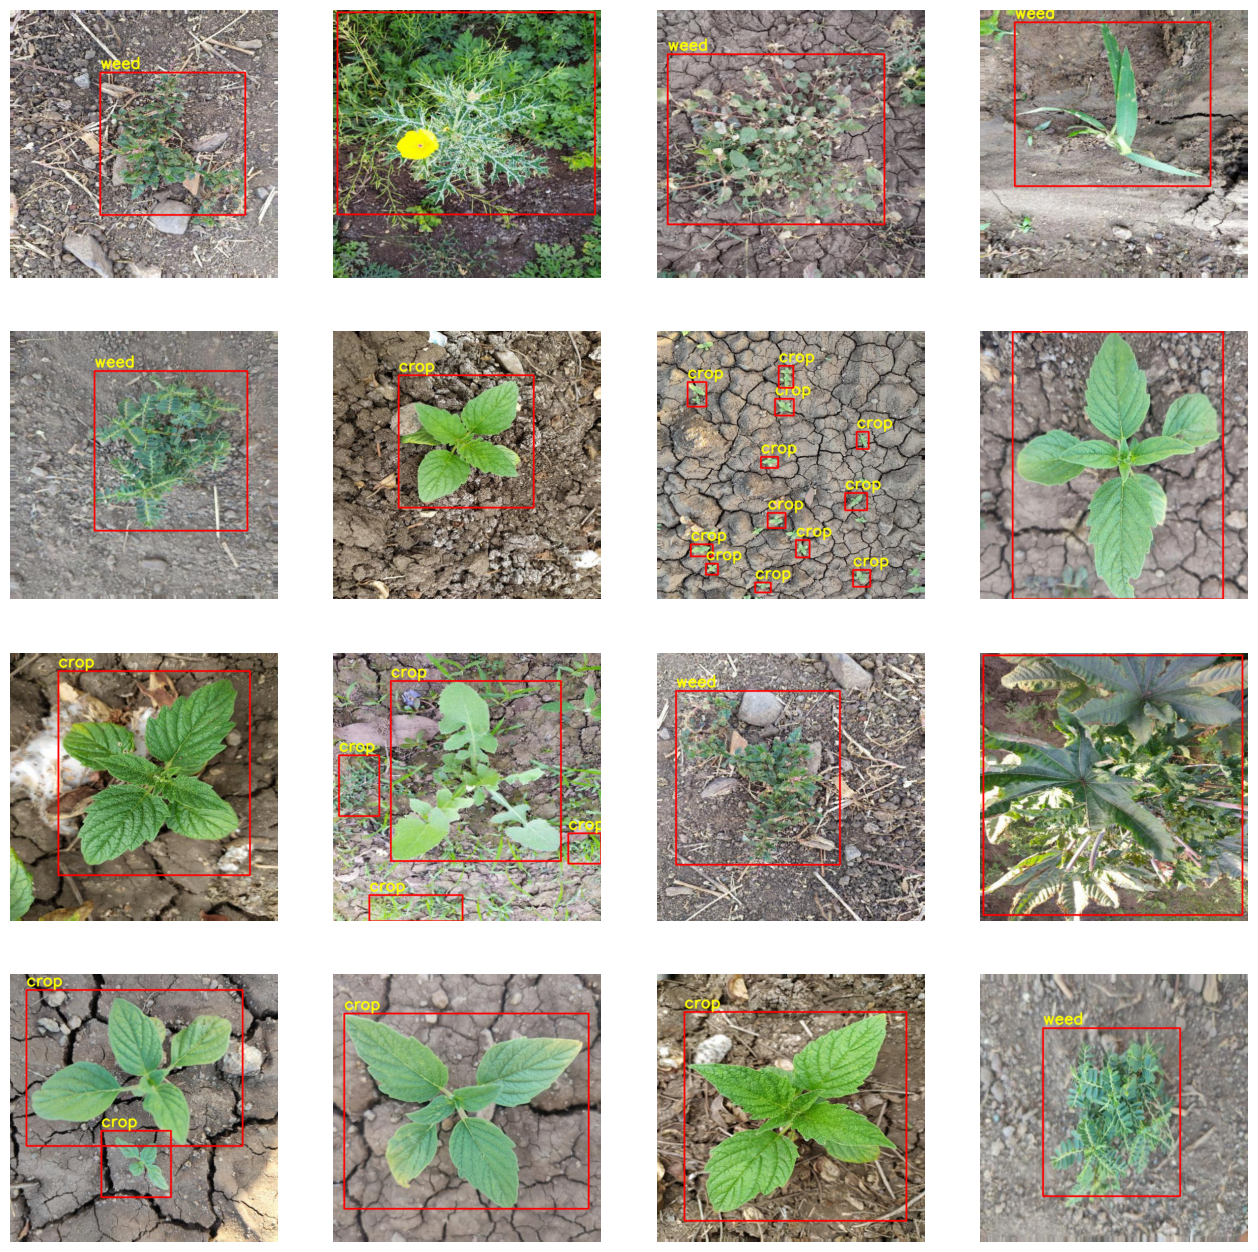

In [30]:
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import pandas as pd

# Define the base path and list of valid image filenames
base_path = r'C:\Users\HP\Downloads\implementation_of_RCNN-master\implementation_of_RCNN-master\DATA\agri_data'
valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']
all_files = os.listdir(base_path)
folder_images = [f for f in all_files if any(f.lower().endswith(ext) for ext in valid_extensions)]

# Load the DataFrame
df = pd.read_csv(r'C:\Users\HP\Downloads\implementation_of_RCNN-master\implementation_of_RCNN-master\DATA\agri_label.csv')

# Ensure we do not try to plot more images than we have
num_images_to_plot = min(16, len(folder_images))

# Create subplots
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easier iteration

for i, ax in tqdm(zip(range(num_images_to_plot), axes)):
    img_filename = folder_images[i]
    img_path = os.path.join(base_path, img_filename)
    
    # Print debugging information
    print(f"Attempting to load image from path: {img_path}")
    
    # Check if file exists and is an image
    if not os.path.isfile(img_path):
        print(f"File does not exist: {img_path}")
        continue

    # Filter DataFrame for the current image
    temp_df = df[df['filename'] == img_filename].reset_index(drop=True)
    
    # Read and process the image
    temp_img = cv2.imread(img_path)
    
    if temp_img is None:
        print(f"Warning: Image at path {img_path} could not be loaded.")
        continue
    
    temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB)
    
    # Draw rectangles and labels on the image
    for j in range(len(temp_df)):
        xmin, ymin = int(temp_df.loc[j, 'xmin']), int(temp_df.loc[j, 'ymin'])
        xmax, ymax = int(temp_df.loc[j, 'xmax']), int(temp_df.loc[j, 'ymax'])
        
        # Check coordinates are within image dimensions
        xmin, ymin = max(0, xmin), max(0, ymin)
        xmax, ymax = min(temp_img.shape[1], xmax), min(temp_img.shape[0], ymax)

        # Draw rectangle and text
        temp_img = cv2.rectangle(temp_img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2, cv2.LINE_AA)
        temp_img = cv2.putText(temp_img, temp_df.loc[j, 'class'], (xmin, ymin - 8),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2, cv2.LINE_AA)
    
    # Show the image in the subplot
    ax.imshow(temp_img)
    ax.axis('off')

plt.show()


# Selective search

In [31]:
import cv2

# Print OpenCV version
print(cv2.__version__)

# Check if ximgproc is available
if hasattr(cv2, 'ximgproc'):
    print("ximgproc module is available")
else:
    print("ximgproc module is not available")


4.10.0
ximgproc module is available


In [32]:
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [33]:
# Construct the correct image path
path = "C:\\Users\\HP\\Downloads\\implementation_of_RCNN-master\\implementation_of_RCNN-master\\DATA\\agri_data"
img_path = os.path.join(path, 'agri_0_129.jpeg')


In [34]:
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

Image path: C:\Users\HP\Downloads\implementation_of_RCNN-master\implementation_of_RCNN-master\DATA\agri_data\agri_0_129.jpeg
Image loaded successfully


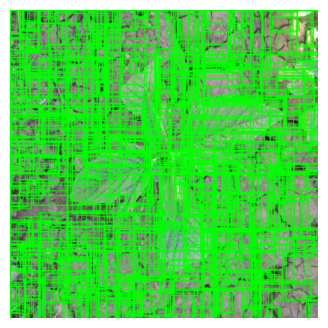

In [35]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to the directory where the ZIP file was extracted
data_dir = "C:\\Users\\HP\\Downloads\\implementation_of_RCNN-master\\implementation_of_RCNN-master\\DATA\\agri_data"

# Name of the image file
image_filename = 'agri_0_129.jpeg'

# Construct the full path to the image file
img_path = os.path.join(data_dir, image_filename)

# Print the constructed path
print("Image path:", img_path)

# Load the image
img = cv2.imread(img_path)

# Check if the image was loaded successfully
if img is None:
    print("Failed to load image at:", img_path)
else:
    print("Image loaded successfully")

    # Initialize selective search segmentation
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    ss.setBaseImage(img)
    ss.switchToSelectiveSearchFast()  # You can also use switchToSelectiveSearchQuality() for higher quality

    # Process the image to get region proposals
    rects = ss.process()
    sel_rects = rects[:1200] if rects is not None else []

    # Check if sel_rects is not empty using len
    if len(sel_rects) == 0:
        print("No region proposals available.")
    else:
        imOut = img.copy()  # Copy the loaded image
        for i, rect in enumerate(sel_rects):
            x, y, w, h = rect
            cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
        
        # Display the image with rectangles
        plt.figure(figsize=(4,4))
        plt.imshow(cv2.cvtColor(imOut, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying with plt
        plt.axis('off')
        plt.show()


# Check for one image

In [36]:
from region_proposals import iou_filter

In [37]:
index_to_use = 0  # Since folder_images has only one element, use index 0

# Construct the full path to the image
image_path = os.path.join(path, folder_images[index_to_use])

# Call the iou_filter function with the valid image path
ss, neg = iou_filter(image_path, df, thresh=0.5)


In [38]:
from region_proposals import iou_filter

Available images and their indices:
Index: 0, Filename: agri_0_9831.jpeg
Image 'agri_0_9831.jpeg' found at index: 0
Attempting to load image from: C:\Users\HP\Downloads\implementation_of_RCNN-master\implementation_of_RCNN-master\DATA\agri_data\agri_0_9831.jpeg


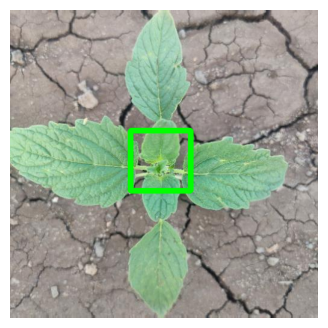

In [39]:
import os

# Define the path and filenames
path = 'C:\\Users\\HP\\Downloads\\implementation_of_RCNN-master\\implementation_of_RCNN-master\\DATA\\agri_data'
folder_images = ["agri_0_9831.jpeg"]  # Update with your actual list of images

# Print all available images and their indices
print("Available images and their indices:")
for index, filename in enumerate(folder_images):
    print(f"Index: {index}, Filename: {filename}")

# Define the target image
target_image = "agri_0_9831.jpeg"

# Find the index of the target image
if target_image in folder_images:
    target_index = folder_images.index(target_image)
    print(f"Image '{target_image}' found at index: {target_index}")
else:
    print(f"Image '{target_image}' not found in the list.")

# Construct the full image path using the found index
img_path = os.path.join(path, folder_images[target_index]) if target_image in folder_images else None

# Attempt to load the image if the path is valid
if img_path:
    print("Attempting to load image from:", img_path)
    img = cv2.imread(img_path)

    # Check if image is loaded correctly
    if img is None:
        print("Error: Image not loaded correctly.")
    else:
        # Draw rectangles on the image (assuming 'ss' contains valid data)
        # Example 'ss' for demonstration purposes
        ss = [[(200, 200, 100, 100)]]  # Update this with your actual bounding boxes
        for i, rect in enumerate(ss):
            x, y, w, h = rect[0]
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 800, 0), 7 ,cv2.LINE_AA)
        
        # Convert BGR image to RGB before displaying with matplotlib
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Display the image
        plt.figure(figsize=(4, 4))
        plt.imshow(img_rgb)
        plt.axis('off')  # Hide axis
        plt.show()
else:
    print("Invalid image path.")


In [40]:
len(ss)

1

In [41]:
len(ss)

1

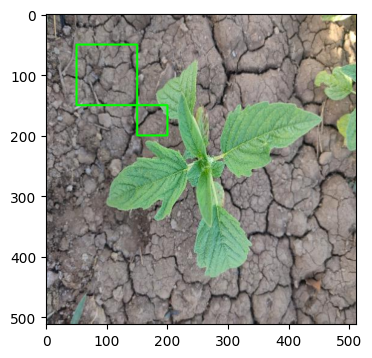

In [42]:
import cv2
import matplotlib.pyplot as plt

# Define the path to the directory containing the images
path = 'C:/Users/HP/Downloads/implementation_of_RCNN-master/implementation_of_RCNN-master/DATA/agri_data/'

# Example of the folder_images list, ensure this is defined
folder_images = ['agri_0_129.jpeg']  # You should replace this with the actual list of image files

# Example of the neg list, ensure this is defined
neg = [(50, 50, 100, 100), (150, 150, 50, 50)]  # Replace with actual coordinates

# Read the image
img = cv2.imread(path + folder_images[0])

# Draw rectangles
for i, rect in enumerate(neg):
    x, y, w, h = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2, cv2.LINE_AA)

# Display the image with rectangles
plt.figure(figsize=(4, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()



# Saving all region proposal of all images

In [43]:
train_data = {}
test_data  = {}

In [44]:
from region_proposals import iou_filter

In [45]:
for i,img in tqdm(enumerate(train_images)):
    ss,neg =iou_filter(path + img , df , thresh=0.5)
    train_data[img] = {'region_proposal':ss,'negative_example':neg}

1000it [1:34:15,  5.66s/it]


In [46]:
for i,img in tqdm(enumerate(test_images)):
    ss,neg =iou_filter(path + img , df , thresh=0.5)
    test_data[img] = {'region_proposal':ss,'negative_example':neg}

300it [30:37,  6.13s/it]


In [47]:
#converting numpy instantant into python datatype
import json
class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

In [48]:
with open('train.json','w+') as output_file:
    json.dump(train_data,output_file,cls=MyEncoder)

In [49]:
with open('test.json','w+') as output_file:
    json.dump(test_data,output_file,cls=MyEncoder)

checking our conversion is right or wrong

In [50]:
with open('train.json') as train:
    train_json = json.load(train)

In [51]:
with open('test.json') as test:
    test_json = json.load(test)

In [52]:
train_json == train_data

True

In [53]:
test_json == test_data

True